# K-means介绍

## 算法描述

聚类是一种无监督的学习，它将相似的对象归到同一簇中。聚类的方法几乎可以应用所有对象，簇内的对象越相似，聚类的效果就越好。K-means算法中的**k表示的是聚类为k个簇，means代表取每一个聚类中数据值的均值作为该簇的中心**，或者称为质心，即用每一个的类的质心对该簇进行描述。

聚类和分类最大的不同在于，分类的目标是事先已知的，而聚类则不一样，聚类事先不知道目标变量是什么，类别没有像分类那样被预先定义出来，所以，聚类有时也叫无监督学习。

聚类分析试图将相似的对象归入同一簇，将不相似的对象归为不同簇，那么，显然需要一种合适的相似度计算方法，我们已知的有很多相似度的计算方法，比如**欧氏距离，余弦距离，汉明距离**等。事实上，我们应该根据具体的应用来选取合适的相似度计算方法。

## 算法过程概述

1. 随机给定簇中心K个
2. 点归属更新:数据点归类到离它最近的簇上
3. 簇重心的更新:计算每一个簇的重心
4. 以上两个步骤循环进行

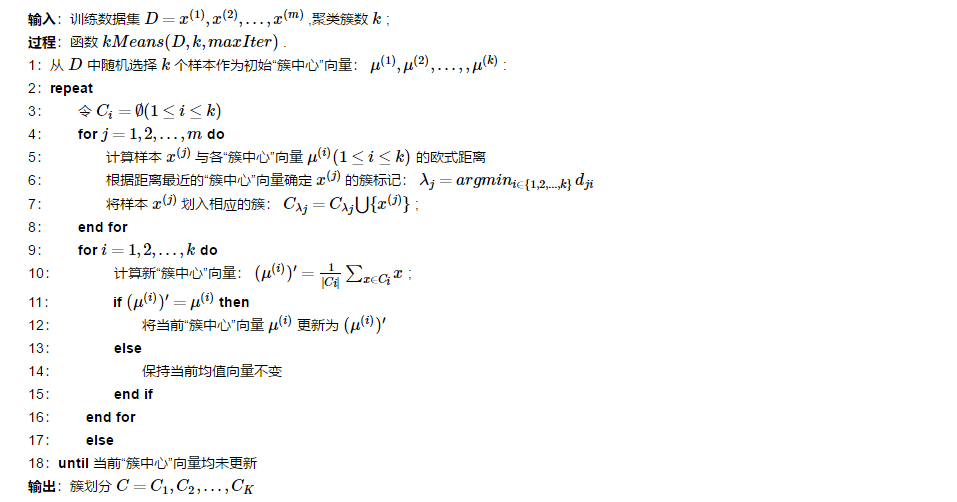

## 算法要点

###  k值的选择

k的选择一般是按照实际需求进行决定，或在实现算法时直接给定 k值。

### 距离的度量

#### 欧式距离

欧几里得度量（euclidean metric）（也称欧氏距离）是一个通常采用的距离定义，指在m维空间中两个点之间的真实距离，或者向量的自然长度（即该点到原点的距离）。在二维和三维空间中的欧氏距离就是两点之间的实际距离。

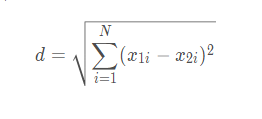

#### 余弦距离

 余弦相似度用向量空间中两个向量夹角的余弦值作为衡量两个个体间差异的大小。相比距离度量，余弦相似度更加注重两个向量在方向上的差异，而非距离或长度上。

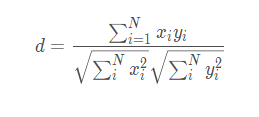

#### 汉明距离

两个整数之间的汉明距离指的是这两个数字对应二进制位不同的位置的数目。比如：
(1011101 与 1001001 为 2)
(2143896 与 2233796 是 3),
可以把它看做将一个字符串变换成另外一个字符串所需要替换的字符个数。

#### 曼哈顿距离

两点在南北方向上的距离加上在东西方向上的距离，即d（i，j）=|xi-xj|+|yi-yj|。对于一个具有正南正北、正东正西方向规则布局的城镇街道，从一点到达另一点的距离正是在南北方向上旅行的距离加上在东西方向上旅行的距离，因此，曼哈顿距离又称为出租车距离。 

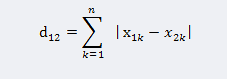

###  更新“簇中心”

对于划分好的各个簇，计算各个簇中的样本点均值，将其均值作为新的簇中心。

## 算法优缺点

### 优点

1. 简单,快速，易理解
2. 当数据呈现高斯分布时,效果好
3. 是谱聚类的基础算法

### 缺点

1. 对初始值敏感,走向局部最优
2. 对噪声敏感
3. K值要提前定
4. 仅适用于类圆形数据(欧式距离)

# 算法详细步骤推演

## 给定初始质心：首先选取初始质心集合centroids

说明:
    1. 质心数量由用户给出，记为k，k-means最终得到的簇数量也是k
    2. 每个质心的数值由初始质心的计算算法计算得到，初始质心计算算法由用户给出
    3. k-means最后聚类的簇个数和用户指定的质心个数相等，一个质心对应一个簇，每个样本只聚类到一个簇里面
    4. 初始簇为空

## 样本聚类：计算每个样本和每个质心的距离，将样本聚类到距离最近的质心的簇里面

说明:
    1. 样本和质心的距离可以使用欧氏距离（欧几里得距离）
       用python表示就是np.sqrt(sum(np.power(p1-p2,2)))，p1=np.array([x1,y1]), p2=np.array([x2, y2])
    2. 如果得到某一个样本和每个质心的距离为：distances=[5, 6, 2, 1,3,9]，则可知此样本将被分到第4个质心所在的簇
       第4个簇的簇号是3，用python表示簇号就是np.argmin(distances) = 3
    3. 经过2，得到k个新的簇，每个样本都被分到k个簇中的某一个簇
    4. 得到k个新的簇后，当前的质心就会失效，需要计算每个新簇的自己的新质心

## 重新计算质心：每个簇的新质心的属性值等于此簇中所有样本的属性值得平均值

说明:
    1. 比如一个新簇有3个样本：[[1,4], [2,5], [3,6]]，得到此簇的新质心=[(1+2+3)/3,   (4+5+6)/3]
    2. 经过3，会得到k个新的质心，作为2中使用的质心

## 是否停止K-means：给定loop最大次数loopLimit 以及 所有质心变化距离的最大值maxDistance

说明:
    1. 当loop次数超过looLimit时，停止k-means
    2. 当所有质心变化的距离组成的序列中的最大值，小于maxDistance时，停止k-means
       旧的质心集合=[[1,1], [2,2], [3,3]]
       新的质心集合=[[1.5,1.5],[4,4],[6,6]]
       所有质心的变化距离序列=[np.sqrt(0.5), np.sqrt(8), np.sqrt(18)] = [0.71, 2.83, 4.24]
       所有质心的变化距离的最大值=max([0.71, 2.83, 4.24]) = 4.24
       如果maxDistance=5, 由于4.24 < maxDistance，则停止k-means
       如果maxDistance=1, 由于4.24 > maxDistance，则继续k-means
    3. 只需要满足loopLimit和maxDistance其中的一个条件，就可以停止k-means


## 判断是否继续 ？

如果step4没有结束k-means，就再执行2-3-4-5

如果4结束了k-means，则就打印(或绘制)簇以及质心

# 代码实现

In [1]:
# coding=gbk
from collections import defaultdict
from random import uniform
from math import sqrt
 
#读取文本文件数据，并做成一个列表
def read_points():
  dataset=[]
  with open('Iris.txt','r') as file:
    for line in file:
      if line =='\n':
        continue
      dataset.append(list(map(float,line.split(' '))))
    file.close() 
    return dataset
 
def write_results(listResult,dataset,k):
  with open('result.txt','a') as file:
    for kind in range(k):
       file.write( "CLASSINFO:%d\n"%(kind+1) )
       for j in listResult[kind]:
         file.write('%d\n'%j)
       file.write('\n')
    file.write('\n\n')
    file.close()
 
def point_avg(points):
  dimensions=len(points[0])
  new_center=[]
  for dimension in range(dimensions):
    sum=0
    for p in points:
      sum+=p[dimension]
    new_center.append(float("%.8f"%(sum/float(len(points)))))
  return new_center
 
def update_centers(data_set ,assignments,k):
  new_means = defaultdict(list)
  centers = []
  for assignment ,point in zip(assignments , data_set):
    new_means[assignment].append(point)
  for i in range(k):
    points=new_means[i]
    centers.append(point_avg(points))
  return centers
 
def assign_points(data_points,centers):
  assignments=[]
  for point in data_points:
    shortest=float('inf')
    shortest_index = 0
    for i in range(len(centers)):
      value=distance(point,centers[i])
      if value<shortest:
        shortest=value
        shortest_index=i
    assignments.append(shortest_index)
  if len(set(assignments))<len(centers) :
      print("\n--!!!产生随机数错误，请重新运行程序！!!!--\n")
      exit()
  return assignments
 
def distance(a,b):
  dimention=len(a)
  sum=0
  for i in range(dimention):
    sq=(a[i]-b[i])**2
    sum+=sq
  return sqrt(sum)
 
def generate_k(data_set,k):
  centers=[]
  dimentions=len(data_set[0])
  min_max=defaultdict(int)
  for point in data_set:
    for i in range(dimentions):
      value=point[i]
      min_key='min_%d'%i
      max_key='max_%d'%i
      if min_key not in min_max or value<min_max[min_key]:
        min_max[min_key]=value
      if max_key not in min_max or value>min_max[max_key]:
        min_max[max_key]=value
  for j in range(k):
    rand_point=[]
    for i in range(dimentions):
      min_val=min_max['min_%d'%i]
      max_val=min_max['max_%d'%i]
      tmp=float("%.8f"%(uniform(min_val,max_val)))
      rand_point.append(tmp)
    centers.append(rand_point)
  return centers
 
#K-means算法实现
def k_means(dataset,k):
  k_points=generate_k(dataset,k)
  assignments=assign_points(dataset,k_points)
  old_assignments=None
  while assignments !=old_assignments:
    new_centers=update_centers(dataset,assignments,k)
    old_assignments=assignments
    assignments=assign_points(dataset,new_centers)
  result=list(zip(assignments,dataset))
  print('\n\n---------------------------------分类结果---------------------------------------\n\n')
  for out in result :
    print(out,end='\n')
  print('\n\n---------------------------------标号简记---------------------------------------\n\n')
  listResult=[[] for i in range(k)]
  count=0
  for i in assignments:
    listResult[i].append(count)
    count=count+1
  write_results(listResult,dataset,k)
  for kind in range(k):
    print("第%d类数据有:"%(kind+1))
    count=0
    for j in listResult[kind]:
       print(j,end=' ')
       count=count+1
       if count%25==0:
         print('\n')
    print('\n')
  print('\n\n--------------------------------------------------------------------------------\n\n')

#主函数,K=3
def main():
  dataset=read_points()
  k_means(dataset,3)
 
if __name__ == "__main__":  
  main()



---------------------------------分类结果---------------------------------------


(2, [5.1, 3.5, 1.4, 0.2])
(2, [4.9, 3.0, 1.4, 0.2])
(2, [4.7, 3.2, 1.3, 0.2])
(2, [4.6, 3.1, 1.5, 0.2])
(2, [5.0, 3.6, 1.4, 0.2])
(2, [5.4, 3.9, 1.7, 0.4])
(2, [4.6, 3.4, 1.4, 0.3])
(2, [5.0, 3.4, 1.5, 0.2])
(2, [4.4, 2.9, 1.4, 0.2])
(2, [4.9, 3.1, 1.5, 0.1])
(2, [5.4, 3.7, 1.5, 0.2])
(2, [4.8, 3.4, 1.6, 0.2])
(2, [4.8, 3.0, 1.4, 0.1])
(2, [4.3, 3.0, 1.1, 0.1])
(2, [5.8, 4.0, 1.2, 0.2])
(2, [5.7, 4.4, 1.5, 0.4])
(2, [5.4, 3.9, 1.3, 0.4])
(2, [5.1, 3.5, 1.4, 0.3])
(2, [5.7, 3.8, 1.7, 0.3])
(2, [5.1, 3.8, 1.5, 0.3])
(2, [5.4, 3.4, 1.7, 0.2])
(2, [5.1, 3.7, 1.5, 0.4])
(2, [4.6, 3.6, 1.0, 0.2])
(2, [5.1, 3.3, 1.7, 0.5])
(2, [4.8, 3.4, 1.9, 0.2])
(2, [5.0, 3.0, 1.6, 0.2])
(2, [5.0, 3.4, 1.6, 0.4])
(2, [5.2, 3.5, 1.5, 0.2])
(2, [5.2, 3.4, 1.4, 0.2])
(2, [4.7, 3.2, 1.6, 0.2])
(2, [4.8, 3.1, 1.6, 0.2])
(2, [5.4, 3.4, 1.5, 0.4])
(2, [5.2, 4.1, 1.5, 0.1])
(2, [5.5, 4.2, 1.4, 0.2])
(2, [4.9, 3.1, 1.5, 0.2])
(2, [5.0,